In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [261]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [263]:
print(data.shape)

(303, 14)


In [264]:
print(data.size)

4242


In [265]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [266]:
for x in data:
    if data[x].dtype=="float64":
        data[x]=data[x].astype("int64")

In [267]:
x=data.drop(columns="output")
y=data.output

In [268]:
#CORRELATION
corr=data.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.178396,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.089604,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.180783,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.190276,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.035479,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.022088,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.055906,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.327627,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.271144,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.178396,0.089604,-0.180783,0.190276,0.035479,0.022088,-0.055906,-0.327627,0.271144,1.000000,-0.555175,0.232167,0.198263,-0.423572


c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp'>

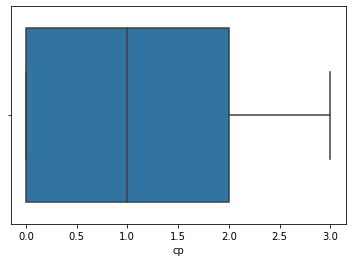

In [269]:
sns.boxplot(data.cp)


c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg'>

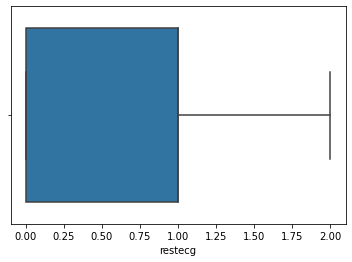

In [270]:
sns.boxplot(data.restecg)


c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slp'>

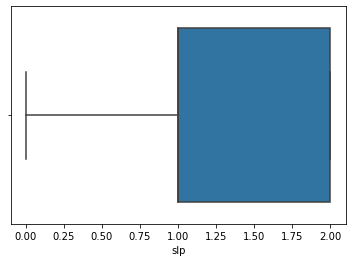

In [271]:
sns.boxplot(data.slp)

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

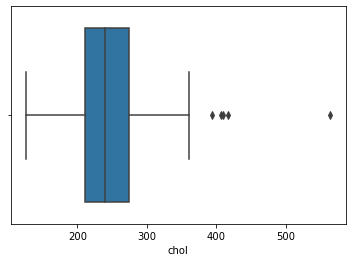

In [272]:
sns.boxplot(data.chol)

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

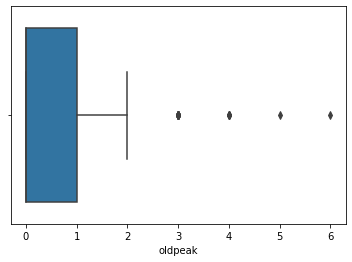

In [273]:
sns.boxplot(data.oldpeak)

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='caa'>

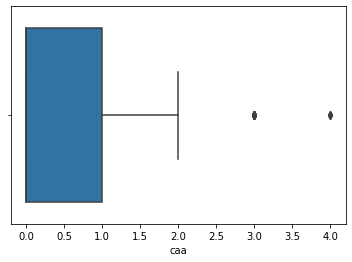

In [274]:
sns.boxplot(data.caa)

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

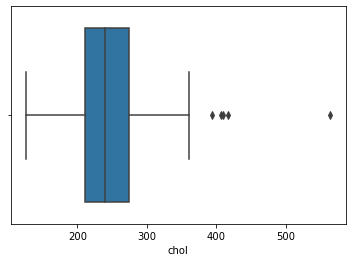

In [275]:
# PLOTS
sns.boxplot(data.chol)

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trtbps'>

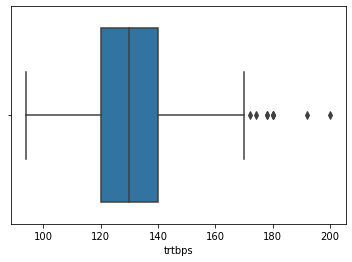

In [276]:
sns.boxplot(data.trtbps)

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs'>

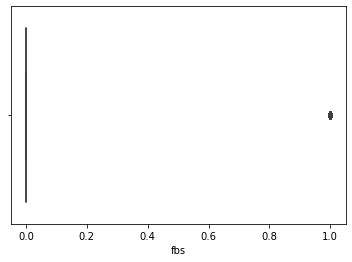

In [277]:
sns.boxplot(data.fbs)

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thall'>

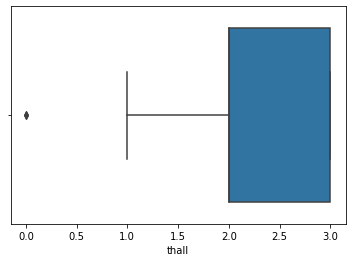

In [278]:
sns.boxplot(data.thall)

In [279]:
#removing cholestrol outliers
for i in range(len(data.chol)):
    if data.chol[i]>=370:
        data.chol=data.chol.replace(data.chol[i],data.chol.mean())
#removing trtbps outliers
for i in range(len(data.trtbps)):
    if data.trtbps[i]>170:
        data.trtbps=data.trtbps.replace(data.trtbps[i],data.trtbps.mean())
#removing thall outliers
for i in range(len(data.thall)):
    if data.thall[i]<1:
        data.thall=data.thall.replace(data.thall[i],data.thall.mean())
#removing oldpeak outliers
for i in range(len(data.oldpeak)):
    if data.oldpeak[i]>=3:
        data.oldpeak=data.oldpeak.replace(data.oldpeak[i],data.oldpeak.mean())

In [280]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# minmax

In [281]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_min= mms.fit_transform(x_train)
x_test_min = mms.transform(x_test)

#PREDICTION

In [282]:
#Random Forest classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_min,y_train)

#predict
rfc_predict=rfc.predict(x_test_min)

rfc_acc=accuracy_score(rfc_predict,y_test)
print(rfc_acc)

0.819672131147541


In [283]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_min,y_train)

#predict
dt_predict=dt.predict(x_test_min)

dt_acc=accuracy_score(dt_predict,y_test)
print(dt_acc)

0.7213114754098361


In [284]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_min,y_train)

#predict
lr_predict=lr.predict(x_test_min)

lr_acc=accuracy_score(lr_predict,y_test)
print(lr_acc)

0.7868852459016393


In [285]:
#Support Vector Classifier
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train_min,y_train)

#predict
sv_predict=sv.predict(x_test_min)

sv_acc=accuracy_score(sv_predict,y_test)
print(sv_acc)

0.8360655737704918


In [286]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train_min , y_train)

knn_predict =knn.predict(x_test_min) 

knn_acc=accuracy_score(y_test,knn_predict)
print(knn_acc)

0.7868852459016393


In [287]:
models = []
from sklearn.metrics import accuracy_score

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))

names = []
scores = []
for name, model in models:
    model.fit(x_train_min, y_train)
    y_pred = model.predict(x_test_min)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.770492
1   DT  0.770492
2   RF  0.803279
3   LR  0.786885
4  SVC  0.836066


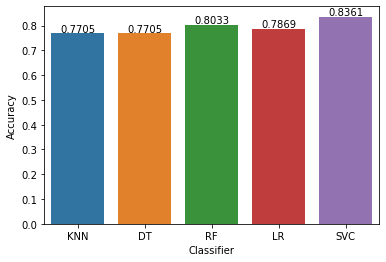

In [288]:

axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# pca


In [289]:
from sklearn.decomposition import PCA
mms=PCA()
x_train_pca = mms.fit_transform(x_train)
x_test_pca = mms.transform(x_test)

In [290]:
#Random Forest classification
from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier()
lr.fit(x_train_pca,y_train)

#predict
lr_predict=lr.predict(x_test_pca)

lr_acc=accuracy_score(lr_predict,y_test)
print(lr_acc)

0.819672131147541


In [291]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_pca,y_train)

#predict
dt_predict=dt.predict(x_test_pca)

dt_acc=accuracy_score(y_test,dt_predict)
print(dt_acc)

0.819672131147541


In [292]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_pca,y_train)

#predicting
lr_predict=lr.predict(x_test_pca)

lr_acc=accuracy_score(y_test,lr_predict)
print(lr_acc)

0.7868852459016393


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [293]:
#Support Vector Classifier
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train_pca,y_train)

#predict
sv_predict=sv.predict(x_test_pca)

sv_acc=accuracy_score(sv_predict,y_test)
print(sv_acc)

0.7049180327868853


In [294]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train_pca , y_train)

knn_predict =knn.predict(x_test_pca) 

knn_acc=accuracy_score(y_test,knn_predict)
print(knn_acc)

0.6721311475409836


In [295]:
models = []
from sklearn.metrics import accuracy_score

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))

names = []
scores = []
for name, model in models:
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.721311
1   DT  0.754098
2   RF  0.852459
3   LR  0.786885
4  SVC  0.704918


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


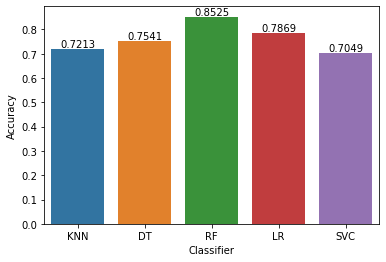

In [296]:

axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()